In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spectral
from pathlib import Path

notebook_path = os.getcwd()
project_root = os.path.dirname(notebook_path)
if project_root not in sys.path: sys.path.append(project_root)
from pipeline_completa import CONFIG

BASE_SILVER = Path(project_root) / "data/silver level"
PATH_CSVS = BASE_SILVER / "dados_calibrados"

plt.rcParams['figure.figsize'] = (14, 8)
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
try:
    path_bronze = Path(project_root) / CONFIG["bronze"]
    primeira_amostra = next(path_bronze.iterdir())
    arquivo_hdr = list((primeira_amostra / "capture").glob("*.hdr"))[0]
    img = spectral.open_image(str(arquivo_hdr))
    wavelengths = np.array(img.bands.centers)
    inicio = CONFIG["bandas_remover_inicio"]
    fim = CONFIG["bandas_remover_fim"]
    wavelengths = wavelengths[inicio:-fim]
    print(f"Eixo X: {len(wavelengths)} bandas ({wavelengths[0]:.1f}nm - {wavelengths[-1]:.1f}nm)")
except:
    print("Usando índice numérico para o eixo X.")
    wavelengths = None

Eixo X: 226 bandas (1004.2nm - 2419.1nm)


/Users/arthurogomes/Documents/IC PUCGO/Code/.venv/lib/python3.13/site-packages/spectral/io/envi.py:187: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


In [3]:
def plotar_todas_amostras(nome_pasta, titulo, cor_base, ylabel="Refletância"):
    path_completo = PATH_CSVS / nome_pasta
    arquivos = sorted(list(path_completo.glob("*.csv")))
    if not arquivos:
        print(f"Nenhum arquivo em {nome_pasta}")
        return
    plt.figure()
    print(f"Plotando {len(arquivos)} amostras de '{nome_pasta}'...")
    for arquivo in arquivos:
        df = pd.read_csv(arquivo, header=None)
        espectro_medio = df.mean(axis=0).values
        eixo_x = wavelengths if wavelengths is not None else np.arange(len(espectro_medio))
        plt.plot(eixo_x, espectro_medio, color=cor_base, alpha=0.5, linewidth=1.2)
    plt.title(titulo, fontsize=18)
    plt.xlabel("Comprimento de Onda (nm)", fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Plotando 19 amostras de 'raw'...


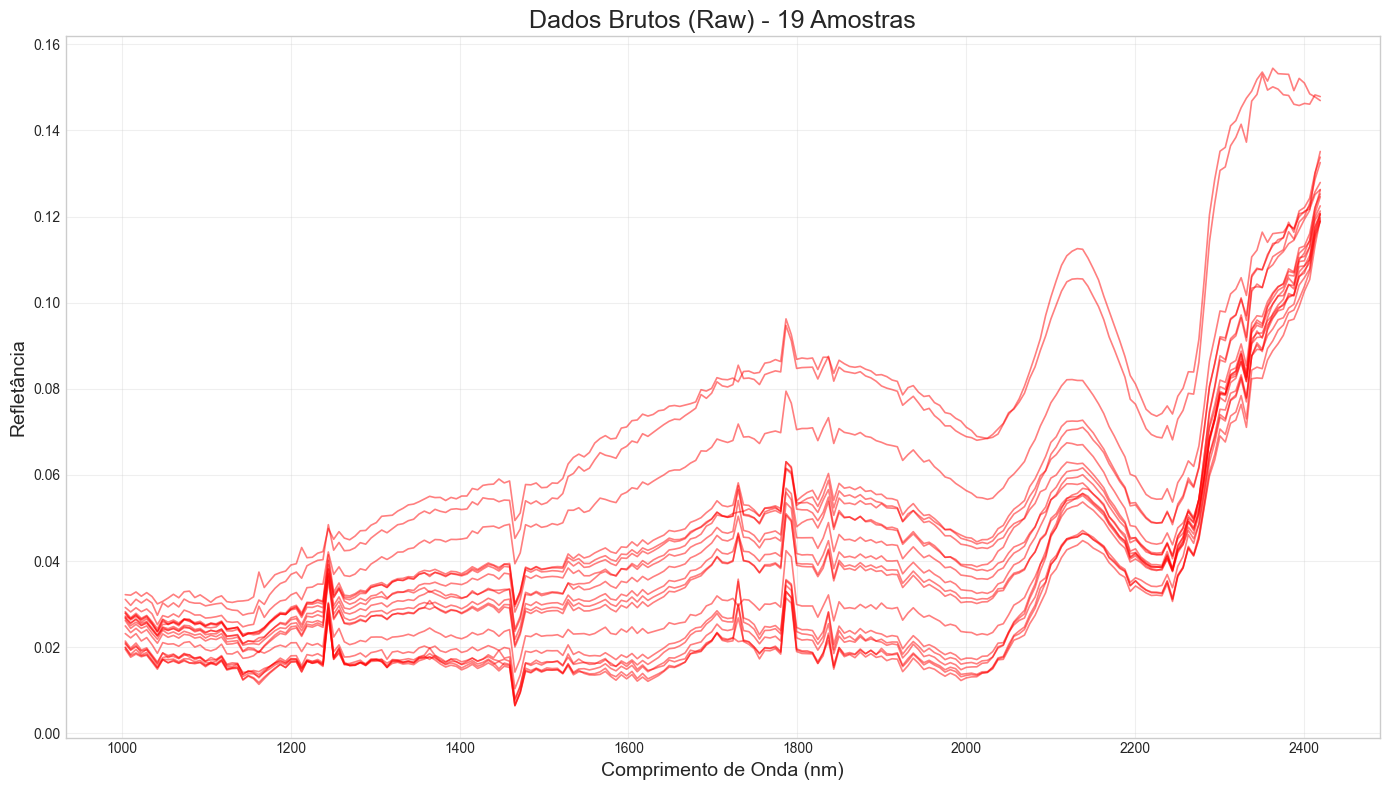

In [4]:
plotar_todas_amostras(
    nome_pasta="raw", 
    titulo="Dados Brutos (Raw) - 19 Amostras", 
    cor_base="red",
    ylabel="Refletância"
)

Plotando 19 amostras de 'msc'...


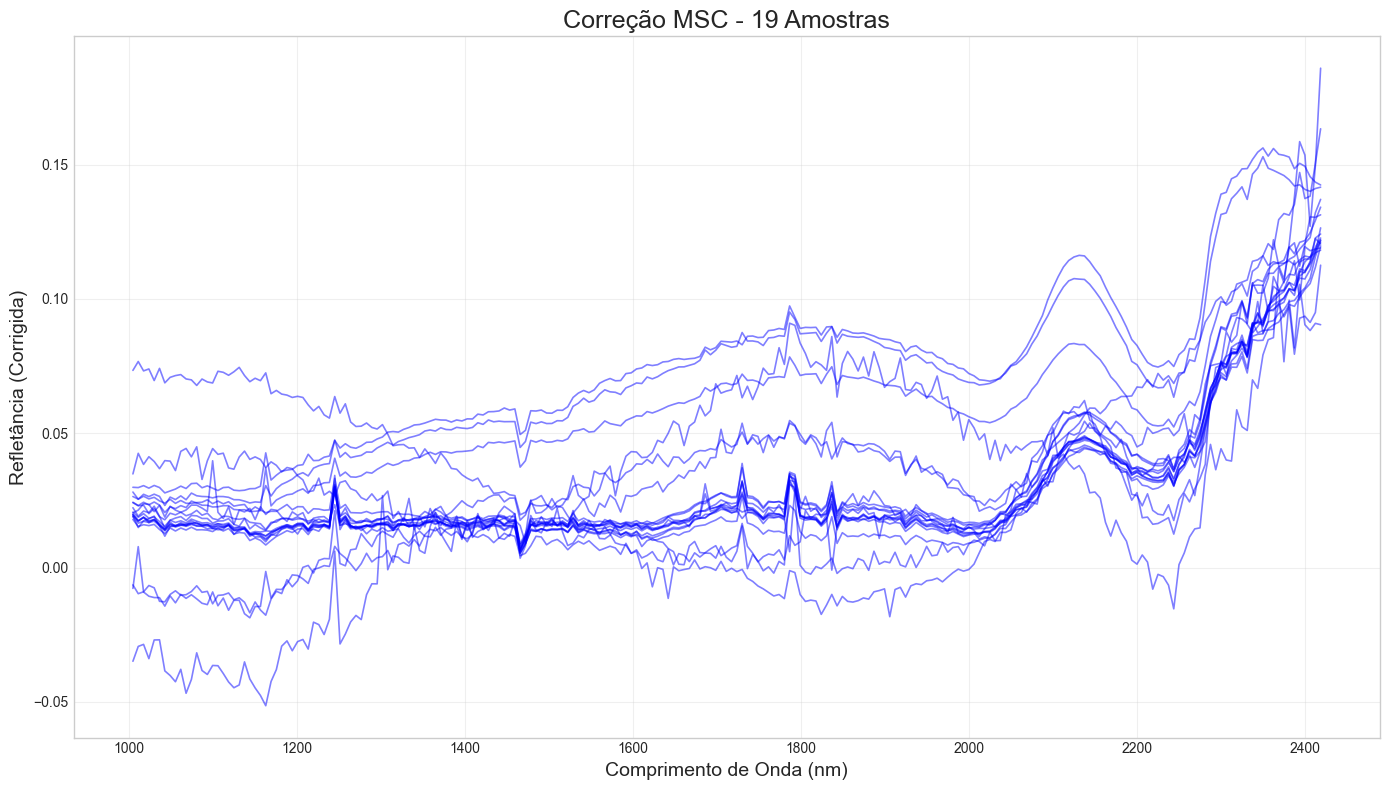

In [5]:
plotar_todas_amostras(
    nome_pasta="msc", 
    titulo="Correção MSC - 19 Amostras", 
    cor_base="blue",
    ylabel="Refletância (Corrigida)"
)

Plotando 19 amostras de 'savigol'...


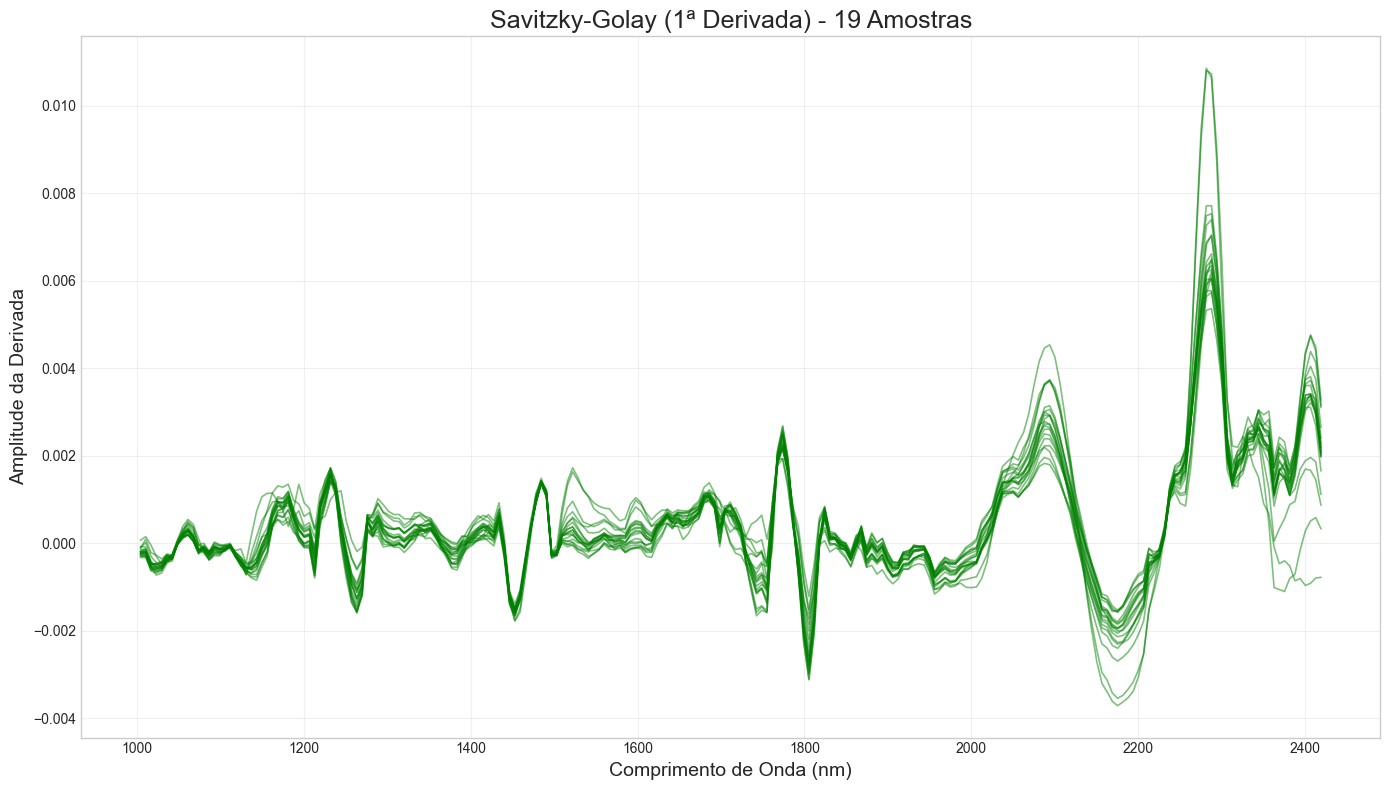

In [6]:
plotar_todas_amostras(
    nome_pasta="savigol", 
    titulo="Savitzky-Golay (1ª Derivada) - 19 Amostras", 
    cor_base="green",
    ylabel="Amplitude da Derivada"
)

Plotando 19 amostras de 'z_score'...


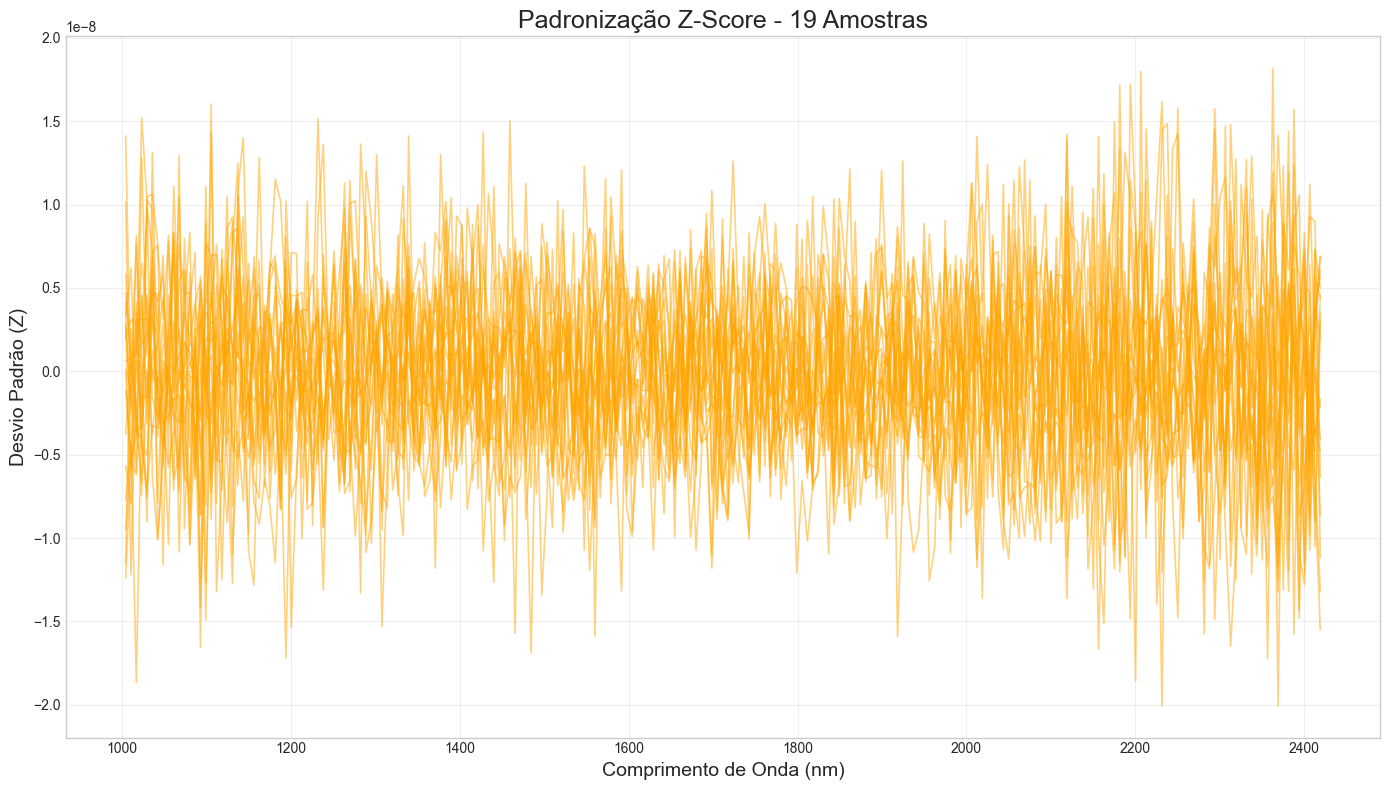

In [7]:
plotar_todas_amostras(
    nome_pasta="z_score", 
    titulo="Padronização Z-Score - 19 Amostras", 
    cor_base="orange",
    ylabel="Desvio Padrão (Z)"
)

/Users/arthurogomes/Documents/IC PUCGO/Code/.venv/lib/python3.13/site-packages/spectral/io/envi.py:187: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


Eixo X Original: 256 bandas (909.2nm - 2512.7nm)
Plotadas 19 amostras do nível Bronze.


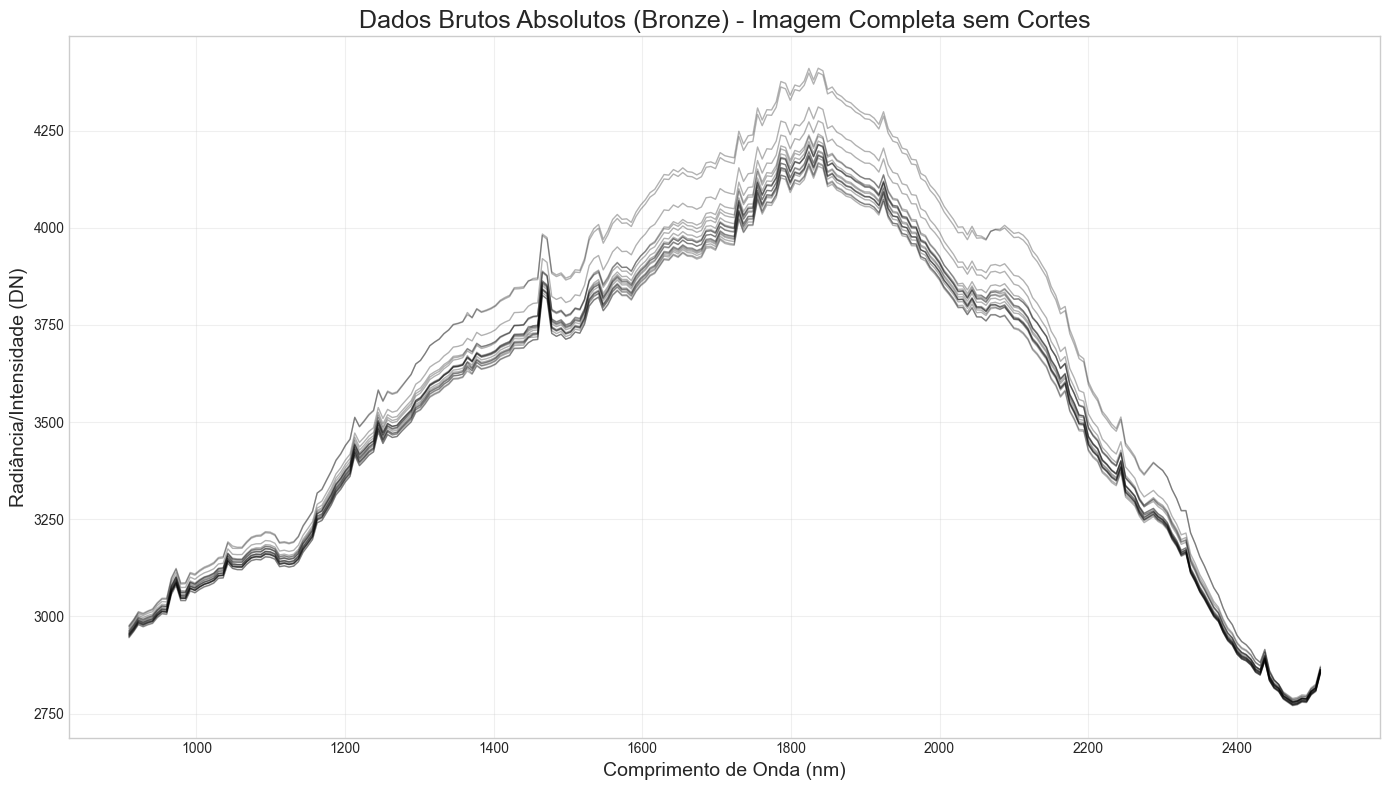

In [ ]:
def plotar_bronze_integral():
    path_bronze = Path(project_root) / CONFIG["bronze"]
    plt.figure(figsize=(14, 8))
    plt.title("Dados Brutos Absolutos (Bronze) - Imagem Completa sem Cortes", fontsize=18)
    wavelengths_bronze = None
    amostras_encontradas = 0
    for sample_dir in sorted(path_bronze.iterdir()):
        if not sample_dir.is_dir(): continue
        path_capture = sample_dir / "capture"
        arquivos_hdr = list(path_capture.glob("*.hdr"))
        arquivo_amostra = None
        for f in arquivos_hdr:
            if "WHITEREF" not in f.name and "DARKREF" not in f.name:
                arquivo_amostra = f
                break
        if arquivo_amostra:
            try:
                img = spectral.open_image(str(arquivo_amostra))
                if wavelengths_bronze is None:
                    wavelengths_bronze = np.array(img.bands.centers)
                    print(f"Eixo X Original: {len(wavelengths_bronze)} bandas ({wavelengths_bronze[0]:.1f}nm - {wavelengths_bronze[-1]:.1f}nm)")
                cubo = img.load()
                media_espectral = np.mean(cubo, axis=(0, 1))
                plt.plot(wavelengths_bronze, media_espectral, color='black', alpha=0.3, linewidth=1)
                amostras_encontradas += 1
            except Exception as e:
                print(f"Erro ao ler {sample_dir.name}: {e}")
    if amostras_encontradas == 0:
        print("Nenhuma amostra encontrada na pasta Bronze.")
    else:
        print(f"Plotadas {amostras_encontradas} amostras do nível Bronze.")
    plt.xlabel("Comprimento de Onda (nm)", fontsize=14)
    plt.ylabel("Radiância/Intensidade (DN)", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
plotar_bronze_integral()